<a href="https://colab.research.google.com/github/SachinYallapurkar/AMAZON-SALES-DATA-ANALYSIS/blob/main/Amazon_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AMAZON SALES DATA ANALYSIS**

**Objective**

To Understand how were the sales for different items.

Importing Required Libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Mounting Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/mount/')

Mounted at /content/mount/


**Reading Excel File From Drive**

In [5]:
sales_data=pd.read_excel('/content/drive/MyDrive/Amazon_Sales_Data_Analysis/SALESDATA.xlsx')

In [6]:
sales_data.shape


(65282, 20)

In [7]:
sales_data


,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000460,2017-01-01,158.0400,2017-01-01,119156,P01,29071,Nationeel Salted Pretzels,8000,181.4400,216666,2017-01-01,204.84,362.8800,59.73,145.11,102.420000,2,154,SE
1,10000460,2017-01-01,420.9000,2017-01-01,119156,P01,28401,Ebony Prepared Salad,4000,966.4400,216666,2017-01-01,545.54,966.4400,278.38,267.16,545.540000,1,154,EA
2,10000460,2017-01-01,663.4100,2017-01-01,119156,P01,29255,Thresher Spicy Mints,9000,507.7500,216666,2017-01-01,859.84,1523.2500,488.68,371.16,286.613333,3,154,EA
3,10000460,2017-01-01,179.4500,2017-01-01,119156,P01,36001,Big Time Frozen Cheese Pizza,12000,412.0300,216666,2017-01-01,232.58,412.0300,84.23,148.35,232.580000,1,154,EA
4,10000460,2017-01-01,1516.5200,2017-01-01,119156,P01,47550,Red Spade Turkey Hot Dogs,13000,1160.7000,216666,2017-01-01,1965.58,3482.1000,957.15,1008.43,655.193333,3,154,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10026081,2019-12-31,272.5230,2019-12-31,329571,NaN,35009,Better Fancy Canned Sardines,1000,39.1545,121831,2019-12-31,6540.36,6812.8830,2969.78,3570.58,37.588276,174,154,EA
65278,10026081,2019-12-31,548.2520,2019-12-31,329573,NaN,29277,Monarch Spaghetti,1000,40.3128,121836,2019-12-31,13158.10,13706.3520,6424.27,6733.83,38.700294,340,154,EA
65279,10026081,2019-12-31,26.2588,2019-12-31,329575,NaN,19857,Moms Cole Slaw,1000,27.3537,121967,2019-12-31,630.23,656.4888,421.22,209.01,26.259583,24,154,EA
65280,10026081,2019-12-31,447.6400,2019-12-31,329574,NaN,35012,Swell Canned Peaches,1000,14.2560,121964,2019-12-31,10743.32,11190.9600,6258.02,4485.30,13.685758,785,154,EA


In [8]:
sales_data.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56996 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [17]:
sales_data.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8286
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [11]:
sales_data1=sales_data.copy()

In [19]:
sales_data1['Item Class'].value_counts()

P01    56966
PO1       16
P04        1
P05        1
P03        1
P14        1
P07        1
P08        1
P09        1
P10        1
P11        1
P15        1
P06        1
P12        1
P13        1
P02        1
Name: Item Class, dtype: int64

In [20]:
# Removing Null Values

sales_data1.dropna(subset=['Discount Amount','Sales Price','Item Number'])

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Invoice_Year,Invoice_Month,Invoice_Quarter,Invoice_Day
0,10000460,2017-01-01,158.0400,2017-01-01,119156,P01,29071,Nationeel Salted Pretzels,8000,181.4400,...,59.73,145.11,102.420000,2,154,SE,2017,1,1,1
1,10000460,2017-01-01,420.9000,2017-01-01,119156,P01,28401,Ebony Prepared Salad,4000,966.4400,...,278.38,267.16,545.540000,1,154,EA,2017,1,1,1
2,10000460,2017-01-01,663.4100,2017-01-01,119156,P01,29255,Thresher Spicy Mints,9000,507.7500,...,488.68,371.16,286.613333,3,154,EA,2017,1,1,1
3,10000460,2017-01-01,179.4500,2017-01-01,119156,P01,36001,Big Time Frozen Cheese Pizza,12000,412.0300,...,84.23,148.35,232.580000,1,154,EA,2017,1,1,1
4,10000460,2017-01-01,1516.5200,2017-01-01,119156,P01,47550,Red Spade Turkey Hot Dogs,13000,1160.7000,...,957.15,1008.43,655.193333,3,154,EA,2017,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10026081,2019-12-31,272.5230,2019-12-31,329571,NaN,35009,Better Fancy Canned Sardines,1000,39.1545,...,2969.78,3570.58,37.588276,174,154,EA,2019,12,4,31
65278,10026081,2019-12-31,548.2520,2019-12-31,329573,NaN,29277,Monarch Spaghetti,1000,40.3128,...,6424.27,6733.83,38.700294,340,154,EA,2019,12,4,31
65279,10026081,2019-12-31,26.2588,2019-12-31,329575,NaN,19857,Moms Cole Slaw,1000,27.3537,...,421.22,209.01,26.259583,24,154,EA,2019,12,4,31
65280,10026081,2019-12-31,447.6400,2019-12-31,329574,NaN,35012,Swell Canned Peaches,1000,14.2560,...,6258.02,4485.30,13.685758,785,154,EA,2019,12,4,31


In [21]:
# Generating Descriptive Statistics

sales_data1.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Invoice_Year,Invoice_Month,Invoice_Quarter,Invoice_Day
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,2017.960877,6.307022,2.414249,16.155878
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,0.946608,3.563510,1.160940,8.795214
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,2017.000000,1.000000,1.000000,1.000000
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,2017.000000,3.000000,1.000000,9.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,2018.000000,6.000000,2.000000,16.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,2019.000000,9.000000,3.000000,24.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,2019.000000,12.000000,4.000000,31.000000


In [22]:
# Creating Year, Month, Quarter, Day Columns in Sales_data01

sales_data1['Invoice_Year'] = sales_data['Invoice Date'].dt.year
sales_data1['Invoice_Month'] = sales_data['Invoice Date'].dt.month
sales_data1['Invoice_Quarter'] = sales_data['Invoice Date'].dt.quarter
sales_data1['Invoice_Day'] = sales_data['Invoice Date'].dt.day

In [23]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56996 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [24]:
# Creating Dataframe only with necessary values

sales_data2 = sales_data1[['CustKey','Item','Invoice Date','Invoice_Year','Invoice_Quarter', 'Invoice_Month',
                           'Invoice_Day', 'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]

In [25]:
sales_data2.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount Based on List Price    0
Discount Amount                     2
Sales Amount                        0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         1
dtype: int64

In [27]:
Final_Data=sales_data2.dropna(subset=['Discount Amount','Sales Price'])

In [28]:
Final_Data.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Amount                        0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

<ipython-input-35-419cabe0f056>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Final_Data.corr(method='pearson'), annot=True,vmin=-1, vmax=1, cmap='YlGnBu')


<Axes: >

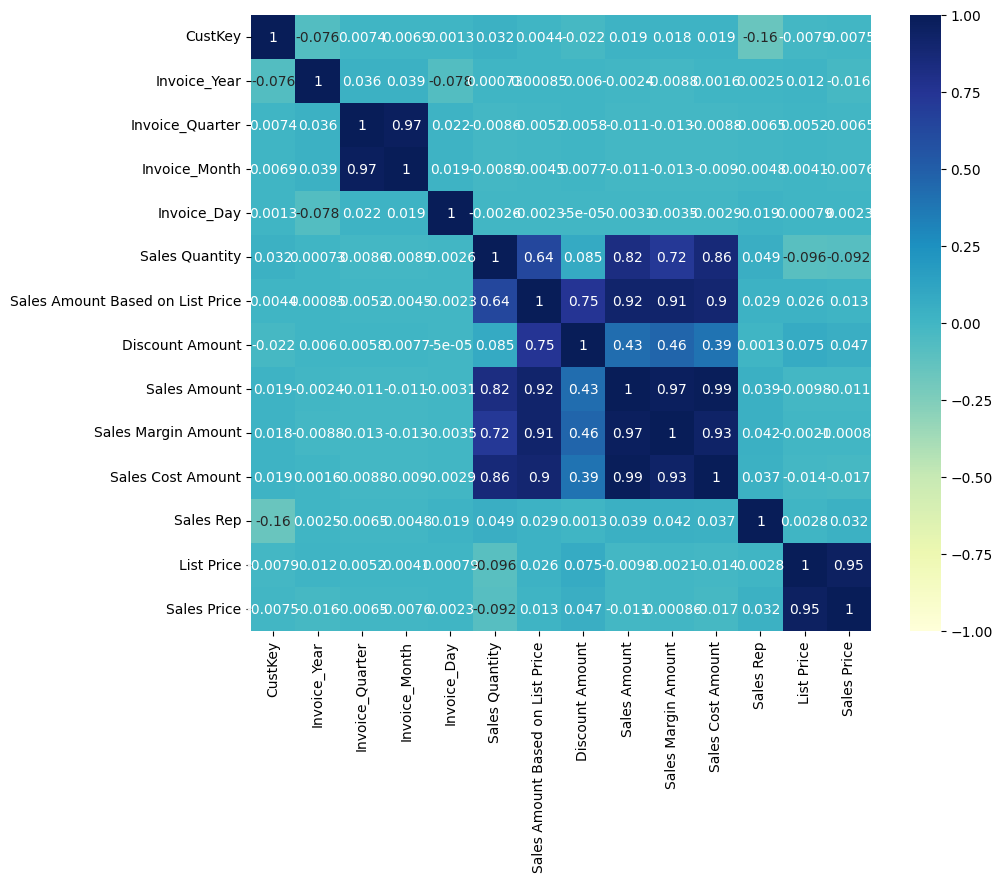

In [35]:
# Checking the Correlation

plt.figure(figsize=(10,8))
sns.heatmap(Final_Data.corr(method='pearson'), annot=True,vmin=-1, vmax=1, cmap='YlGnBu')